# Principle Component Analysis

This notebooks assumes you have prior experience with pca. We will look at pca within our specific use case, to reduce the dimensionality of our coordinate set, and then recovery of these coordinates when inversing our pca.

In the case a two dimensional dataset, with 1 principle component and two dimensions recovered, this example can be viewed graphically below:

<img src='pca_reconstruction.png'>

For an indepth look please read through this article: https://stats.stackexchange.com/questions/229092/how-to-reverse-pca-and-reconstruct-original-variables-from-several-principal-com

We will now look at this with our usecase: decompsing and reconstructing a facial coordinate set. 

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import cv2
import dlib
import os

In [3]:
## get coordinates of test image and save in 1D array

# dlib face detector and shape predictor
detector = dlib.get_frontal_face_detector()
model_dlib = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

imgs = os.listdir('ex_imgs/')
coords = []

# for test images get coordinates and save in array
for img in imgs:
    # read the image
    image = cv2.imread('ex_imgs/' + img)

    # grayscale version of image
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # detect faces in picture (There may be many faces)
    faces = detector(gray)

    if len(faces) == 1:
        # for each face in faces
        for face in faces:
            # extract co-ordinates of facial detector
            left = face.left()
            top = face.top()
            right = face.right()
            bottom = face.bottom()
            width = face.width()
            height = face.height()

            # use predictor to gather facial landmarks
            landmarks_dlib = model_dlib(gray, face)

    img_coords = []
    for n in range(68):
        x = landmarks_dlib.part(n).x
        y = landmarks_dlib.part(n).y
        img_coords.append([x,y])

    img_coords = np.array(img_coords)
    img_coords = img_coords.flatten()
    
    coords.append(img_coords)
    
coords = np.array(coords)    

In [4]:
# store coordinates in dataframe
df_Y = pd.DataFrame(coords, index=imgs)
Y = df_Y.to_numpy()

# feature scaling
sc_Y = StandardScaler()
Y_scaled = sc_Y.fit_transform(df_Y)

# principle component analysis
pca_Y = PCA(n_components=32)
Y_pca = pca_Y.fit_transform(Y_scaled)

# explained variance
explained_variance = pca_Y.explained_variance_ratio_
print('Variance explained Y: ' + str(np.array(explained_variance).sum()*100) + ' %')



Variance explained Y: 99.89211073391613 %


In [5]:
Y_recovered = pca_Y.inverse_transform(Y_pca)
Y_recovered = sc_Y.inverse_transform(Y_recovered)

In [6]:
# the total sum difference of original coords vs recored coors
print((Y[0] - Y_recovered[0]).sum())

# the max difference of original coords vs recored coors
print((Y[0] - Y_recovered[0]).max())

# the max difference of original coords vs recored coors
print((Y[0] - Y_recovered[0]).min())

1.0437957307979673
1.5122249191642254
-0.9895970757787893


In [7]:
df_Y_recovered = pd.DataFrame(Y_recovered, index=df_Y.index)

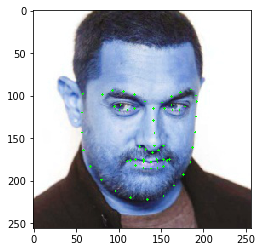

In [8]:
img = cv2.imread('ex_imgs/Aamir_Khan_r_4.jpg')

for coord in df_Y.loc['Aamir_Khan_r_4.jpg'].to_numpy().reshape(68,2):
    x = int(coord[0])
    y = int(coord[1])
    cv2.circle(img, (x, y), 1, (0, 255, 0), -1)

plt.imshow(img)

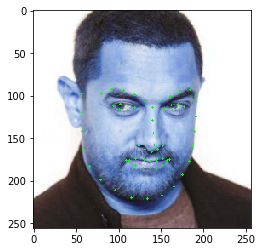

In [9]:
img = cv2.imread('ex_imgs/Aamir_Khan_r_4.jpg')

for coord in df_Y_recovered.loc['Aamir_Khan_r_4.jpg'].to_numpy().reshape(68,2):
    x = int(coord[0])
    y = int(coord[1])
    cv2.circle(img, (x, y), 1, (0, 255, 0), -1)

plt.imshow(img)

We can see both visually and numerically we have recovered enough information from our inverse pca to accurately plot the facial coordinates of our example.